In [29]:
%pip install pyvis
%pip install nxviz
%pip install pandas
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 29.6 MB 9.7 MB/s eta 0:00:011
You should consider upgrading 

In [2]:
import pandas as pd
from nxviz import CircosPlot
from pyvis.network import Network
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import networkx as nx

/Users/natalyenne/Library/Python/3.9/lib/python/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(
/var/folders/g9/nxpm3gzj3l77tx8_j2wv_9700000gn/T/ipykernel_39053/734387779.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Análise dos Filmes Originais Netflix 

O objetivo do dataset é "brincar" um pouco com os dados, avaliando principalmente as relações dos filmes de gênero Thriller.

In [3]:
df = pd.read_csv('../dataset/NetflixOriginals.csv', encoding='latin1')

Matriz de adjacência para os filmes que possuem gênero de ação

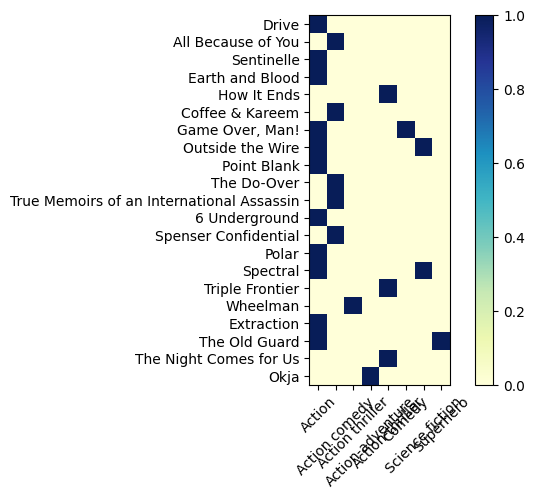

In [4]:
action_genre = 'Action'

# filtra apenas para o gênero de ação
df_filtered = df[df['Genre'].str.contains(action_genre)]

all_genres = set()
for genres in df_filtered['Genre']:
    split_genres = genres.split('/')
    for genre in split_genres:
        all_genres.add(genre)

all_genres = sorted(all_genres)

# cria a matriz de adjacência
adjacency_matrix = np.zeros((len(df_filtered), len(all_genres)), dtype=int)

for i, genres in enumerate(df_filtered['Genre']):
    split_genres = genres.split('/')
    for genre in split_genres:
        j = all_genres.index(genre)
        adjacency_matrix[i, j] = 1

adjacency_df = pd.DataFrame(adjacency_matrix, columns=all_genres)

plt.imshow(adjacency_df.values, cmap='YlGnBu')

# configura os rótulos dos eixos x e y
plt.xticks(ticks=range(len(all_genres)), labels=all_genres, rotation=45)
plt.yticks(ticks=range(len(df_filtered)), labels=df_filtered['Title'])

plt.colorbar()
plt.show()

Abaixo é criado um grafo não direcionado. Em seguida, adiciona-se nós e arestas

É adicionado nós ao grafo que correspondem aos títulos dos filmes da coluna 'Title'. Cada nó recebe um atributo 'ntype' com o valor 'movie' para indicar que é um nó de filme.

In [5]:
# criar um grafo "normal"
C = nx.Graph()

C.add_nodes_from(df['Title'], ntype='movie')

# add arestas ao grafo com base na coluna genero
for index, row in df.iterrows():
    title = row['Title']
    genres = row['Genre'].split('/')
    for genre in genres:
        C.add_edge(title, genre)

Verifica se o grafo é conectado; caso seja, calcula o diâmetro.

In [6]:
if nx.is_connected(C):
    diameter = nx.diameter(C)
    print("Diâmetro:", diameter)
else:
    print("Error. Não é possível achar o diâmetro")

Error. Não é possível achar o diâmetro


Verifica se o grafo é conectado; caso seja, encontra os nós periféricos do grafo

In [7]:
if nx.is_connected(C):
    peripheral_nodes = nx.periphery(C)
    print("Nós periféricos da rede:", peripheral_nodes)
else:
    print("Error. Não é possível achar a periferia da rede")

Error. Não é possível achar a periferia da rede


Histograma de distribuição empírica de grau

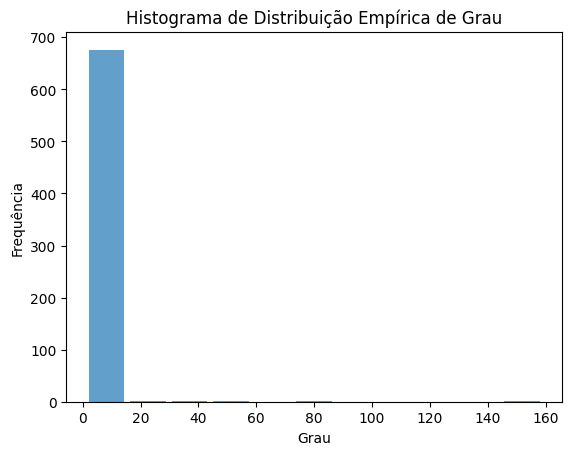

In [8]:
degree_sequence = [d for n, d in C.degree()]

plt.hist(degree_sequence, bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Histograma de Distribuição Empírica de Grau')

plt.show()

Clustering local para nós específicos

In [9]:
nodes_of_interest = ['Mercy', 'Dark Forces', 'Rebirth']

clustering_coefficients = nx.clustering(C, nodes_of_interest)

for node, coefficient in clustering_coefficients.items():
    print(f"Coeficiente de Clustering Local para o nó {node}: {coefficient}")

Coeficiente de Clustering Local para o nó Mercy: 0
Coeficiente de Clustering Local para o nó Dark Forces: 0
Coeficiente de Clustering Local para o nó Rebirth: 0


Coeficiente de clustering global. Nesse caso será 0, pois não há agrupamento ou conexão entre os vizinhos dos nós no grafo

In [10]:
clustering_coefficient_global = nx.average_clustering(C)

print("Coeficiente de Clustering Global: ", clustering_coefficient_global)

Coeficiente de Clustering Global:  0.0


Filtrando os filmes do gênero Thriller e criando um grafo direcionado

In [11]:
# filtra filmes do gênero "Thriller"
thriller_movies = df[df['Genre'].str.contains('Thriller')]

# cria um grafo direcionado
D = nx.DiGraph()

D.add_nodes_from(thriller_movies['Title'], ntype='movie')

for index, row in thriller_movies.iterrows():
    title = row['Title']
    genres = row['Genre'].split('/')
    for genre in genres:
        C.add_edge(title, genre)

Componentes conectados fortemente do gênero Thriller

In [12]:
strongly_connected_components = list(nx.strongly_connected_components(D))

print("Componentes Conectados Fortemente (Gênero Thriller):")
for component in strongly_connected_components:
    print(component)

Componentes Conectados Fortemente (Gênero Thriller):
{'Dark Forces'}
{'The Last Days of American Crime'}
{'Mercy'}
{'Secret Obsession'}
{'The Girl on the Train'}
{'Fatal Affair'}
{'Christmas Crossfire'}
{'Mrs. Serial Killer'}
{'Rebirth'}
{'Clinical'}
{'Dangerous Lies'}
{'Intuition'}
{'The Most Assassinated Woman in the World'}
{'Guilty'}
{'Dead Kids'}
{'Red Dot'}
{'Hold the Dark'}
{'The Paramedic'}
{'Prime Time'}
{'Velvet Buzzsaw'}
{'Extinction'}
{'I Am All Girls'}
{'TAU'}
{'A Fall from Grace'}
{'The Decline'}
{'iBoy'}
{'Unknown Origins'}
{'In the Shadow of the Moon'}
{'Lost Bullet'}
{'Offering to the Storm'}
{'Time to Hunt'}
{'ARQ'}
{'Fractured'}
{'The Occupant'}
{'His House'}
{'Calibre'}
{'AK vs AK'}
{'Raat Akeli Hai'}


Componentes conectados fracamente do gênero Thriller

In [13]:
weakly_connected_components = list(nx.weakly_connected_components(D))

print("Componentes Conectados Fracamente (Gênero: Thriller):")
for component in weakly_connected_components:
    print(component)

Componentes Conectados Fracamente (Gênero: Thriller):
{'Dark Forces'}
{'The Last Days of American Crime'}
{'Mercy'}
{'Secret Obsession'}
{'The Girl on the Train'}
{'Fatal Affair'}
{'Christmas Crossfire'}
{'Mrs. Serial Killer'}
{'Rebirth'}
{'Clinical'}
{'Dangerous Lies'}
{'Intuition'}
{'The Most Assassinated Woman in the World'}
{'Guilty'}
{'Dead Kids'}
{'Red Dot'}
{'Hold the Dark'}
{'The Paramedic'}
{'Prime Time'}
{'Velvet Buzzsaw'}
{'Extinction'}
{'I Am All Girls'}
{'TAU'}
{'A Fall from Grace'}
{'The Decline'}
{'iBoy'}
{'Unknown Origins'}
{'In the Shadow of the Moon'}
{'Lost Bullet'}
{'Offering to the Storm'}
{'Time to Hunt'}
{'ARQ'}
{'Fractured'}
{'The Occupant'}
{'His House'}
{'Calibre'}
{'AK vs AK'}
{'Raat Akeli Hai'}


Aqui criamos uma relação entre os filmes com base na pontuação do IMDB.

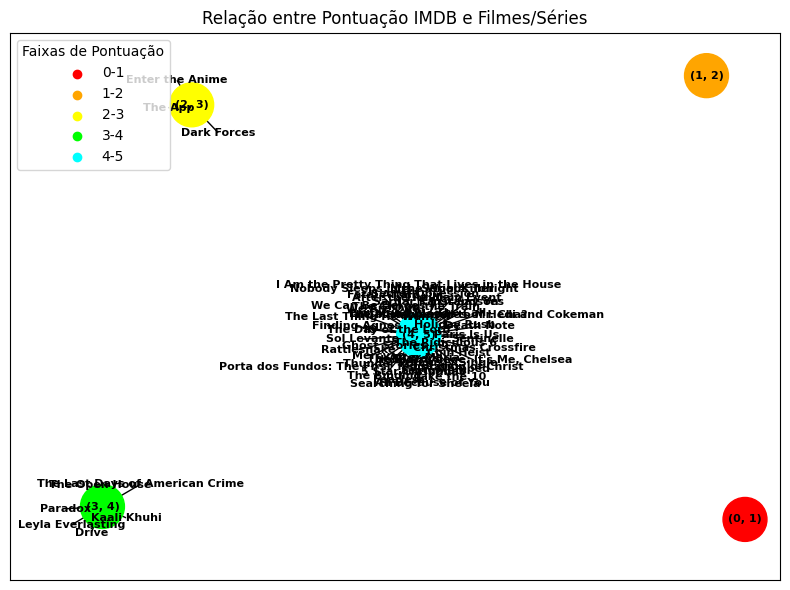

In [14]:
G = nx.Graph()

# faixas de pontuação
faixas = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

# percorre o dataset e adiciona os nós das faixas de pontuação ao grafo
for faixa in faixas:
    G.add_node(faixa)

# percorre o dataset e adiciona as arestas entre os filmes da mesma faixa de pontuação
for i in range(len(df)):
    pontuacao = df.loc[i, 'IMDB Score']
    for faixa in faixas:
        if faixa[0] <= pontuacao < faixa[1]:
            G.add_edge(faixa, df.loc[i, 'Title'])
            break


pos = nx.spring_layout(G)


node_colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF']

# plot do grafo
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, nodelist=faixas, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

for i, faixa in enumerate(faixas):
    plt.scatter([], [], c=node_colors[i], label=f'{faixa[0]}-{faixa[1]}')
plt.legend(title='Faixas de Pontuação')

plt.title('Relação entre Pontuação IMDB e Filmes')
plt.tight_layout()
plt.show()


Aqui avaliamos a importância de cada faixa em relação ao IMDB Score, com base na sua conectividade com outros nós de alta centralidade

In [15]:
eigenvector_centrality = nx.eigenvector_centrality(G)

print("Eigenvector centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

Eigenvector centrality:
(0, 1): 6.101462676234007e-37
(1, 2): 6.101462676234007e-37
(2, 3): 2.4012843964941202e-19
(3, 4): 3.4068509751953105e-15
(4, 5): 0.7071036124682362
Enter the Anime: 1.3863821927167282e-19
Dark Forces: 1.3863821927167282e-19
The App: 1.3863821927167282e-19
The Open House: 1.390841086488631e-15
Kaali Khuhi: 1.390841086488631e-15
Drive: 1.390841086488631e-15
Leyla Everlasting: 1.390841086488631e-15
The Last Days of American Crime: 1.390841086488631e-15
Paradox: 1.390841086488631e-15
Sardar Ka Grandson: 0.10540972770146557
Searching for Sheela: 0.10540972770146557
The Call: 0.10540972770146557
Whipped: 0.10540972770146557
All Because of You: 0.10540972770146557
Mercy: 0.10540972770146557
After the Raid: 0.10540972770146557
Ghost Stories: 0.10540972770146557
The Last Thing He Wanted: 0.10540972770146557
What Happened to Mr. Cha?: 0.10540972770146557
Death Note: 0.10540972770146557
Hello Privilege. It's Me, Chelsea: 0.10540972770146557
Secret Obsession: 0.10540972770

Visualizando os nós por Engeinvector Centrality

/var/folders/g9/nxpm3gzj3l77tx8_j2wv_9700000gn/T/ipykernel_39053/815562751.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


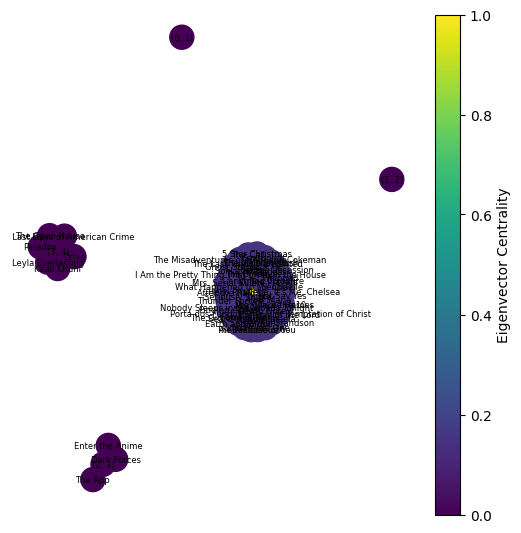

In [16]:
eigenvector_centrality = nx.eigenvector_centrality(G)

plt.figure(figsize=(5, 5))

color_map = [eigenvector_centrality[node] for node in G.nodes()]

pos = nx.spring_layout(G, seed=42)
cmap = plt.cm.viridis  
nx.draw(G, with_labels=False, pos=pos, node_color=color_map, edge_color='gray', cmap=cmap)
nx.draw_networkx_labels(G, pos, font_size=6)

sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Eigenvector Centrality')
plt.show()

Centralidade de grau para cada nó no grafo

In [17]:
degree_centrality = nx.degree_centrality(C)

print("Degree centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node} = {centrality}")

Degree centrality:
Enter the Anime = 0.0014684287812041115
Dark Forces = 0.0014684287812041115
The App = 0.002936857562408223
The Open House = 0.0014684287812041115
Kaali Khuhi = 0.0014684287812041115
Drive = 0.0014684287812041115
Leyla Everlasting = 0.0014684287812041115
The Last Days of American Crime = 0.002936857562408223
Paradox = 0.004405286343612334
Sardar Ka Grandson = 0.0014684287812041115
Searching for Sheela = 0.0014684287812041115
The Call = 0.0014684287812041115
Whipped = 0.0014684287812041115
All Because of You = 0.0014684287812041115
Mercy = 0.0014684287812041115
After the Raid = 0.0014684287812041115
Ghost Stories = 0.0014684287812041115
The Last Thing He Wanted = 0.0014684287812041115
What Happened to Mr. Cha? = 0.0014684287812041115
Death Note = 0.0014684287812041115
Hello Privilege. It's Me, Chelsea = 0.0014684287812041115
Secret Obsession = 0.0014684287812041115
Sextuplets = 0.0014684287812041115
The Girl on the Train = 0.0014684287812041115
Thunder Force = 0.001468

Aqui vemos a a centralidade de proximidade do grafo todo.

In [27]:
closeness_centrality = nx.closeness_centrality(C)

print("Closeness centrality:")
for node, centrality in closeness_centrality.items():
    print(f" {node} = {centrality}")

Closeness centrality:
 Enter the Anime = 0.11710835336789005
 Dark Forces = 0.059947666763284335
 The App = 0.08926620176330355
 The Open House = 0.002643171806167401
 Kaali Khuhi = 0.05576315588147693
 Drive = 0.0734468748685409
 Leyla Everlasting = 0.07959838207774722
 The Last Days of American Crime = 0.060012933684093564
 Paradox = 0.06558224817232593
 Sardar Ka Grandson = 0.07959838207774722
 Searching for Sheela = 0.11710835336789005
 The Call = 0.079141248512333
 Whipped = 0.03010279001468429
 All Because of You = 0.004078968836678088
 Mercy = 0.059947666763284335
 After the Raid = 0.11710835336789005
 Ghost Stories = 0.0014684287812041115
 The Last Thing He Wanted = 0.0014684287812041115
 What Happened to Mr. Cha? = 0.07959838207774722
 Death Note = 0.002643171806167401
 Hello Privilege. It's Me, Chelsea = 0.11710835336789005
 Secret Obsession = 0.059947666763284335
 Sextuplets = 0.07959838207774722
 The Girl on the Train = 0.059947666763284335
 Thunder Force = 0.00146842878120

Visualizando a Closeness Centrality

/var/folders/g9/nxpm3gzj3l77tx8_j2wv_9700000gn/T/ipykernel_39053/3126096408.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
/Users/natalyenne/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


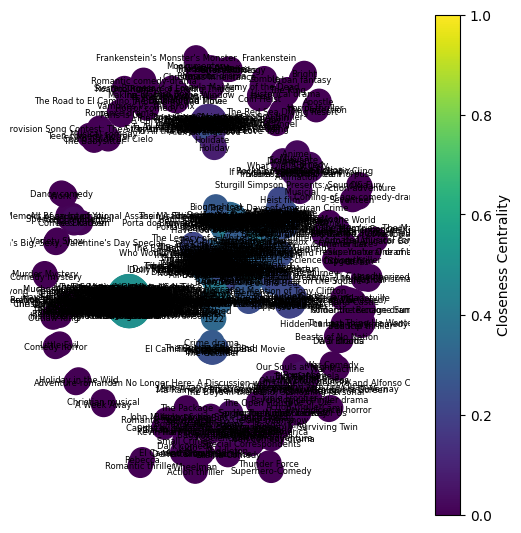

In [31]:
closeness_centrality = nx.closeness_centrality(C)
plt.figure(figsize=(5, 5))

color_map = [closeness_centrality[node] for node in C.nodes()]

pos = nx.spring_layout(C, seed=42)
cmap = plt.cm.viridis  
nx.draw(C, with_labels=False, pos=pos, node_color=color_map, edge_color='gray', cmap=cmap)
nx.draw_networkx_labels(C, pos, font_size=6)

sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Closeness Centrality')
plt.show()

Aqui vemos o cálculo da importância de um nó como intermediário nas conexões entre outros pares de nós no grafo.
Além disso, é possível ver que o gênero 'Comedy' possui a maior centralidade de intermediação

In [32]:
betweenness_centrality = nx.betweenness_centrality(C)

print("Betweenness centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"{node} = {centrality}")

max_node = max(betweenness_centrality, key=betweenness_centrality.get)
print("Nó com maior betweenness centrality:", max_node)

Betweenness centrality:
Enter the Anime = 0.0
Dark Forces = 0.0
The App = 0.010337471258694395
The Open House = 0.0
Kaali Khuhi = 0.0
Drive = 0.0
Leyla Everlasting = 0.0
The Last Days of American Crime = 0.0011790619331433015
Paradox = 0.006656177158574159
Sardar Ka Grandson = 0.0
Searching for Sheela = 0.0
The Call = 0.0
Whipped = 0.0
All Because of You = 0.0
Mercy = 0.0
After the Raid = 0.0
Ghost Stories = 0.0
The Last Thing He Wanted = 0.0
What Happened to Mr. Cha? = 0.0
Death Note = 0.0
Hello Privilege. It's Me, Chelsea = 0.0
Secret Obsession = 0.0
Sextuplets = 0.0
The Girl on the Train = 0.0
Thunder Force = 0.0
Fatal Affair = 0.0
Just Say Yes = 0.0
Seriously Single = 0.0
The Misadventures of Hedi and Cokeman = 0.0
5 Star Christmas = 0.0
After Maria = 0.0
I Am the Pretty Thing That Lives in the House = 0.0
Paris Is Us = 0.0
Porta dos Fundos: The First Temptation of Christ = 0.0
Rattlesnake = 0.0
The Players = 0.0
We Are One = 0.0
Finding Agnes = 0.0
IO = 0.010337471258694395
Sentin

Visualizando a Betweenness Centrality

/var/folders/g9/nxpm3gzj3l77tx8_j2wv_9700000gn/T/ipykernel_39053/4017649420.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


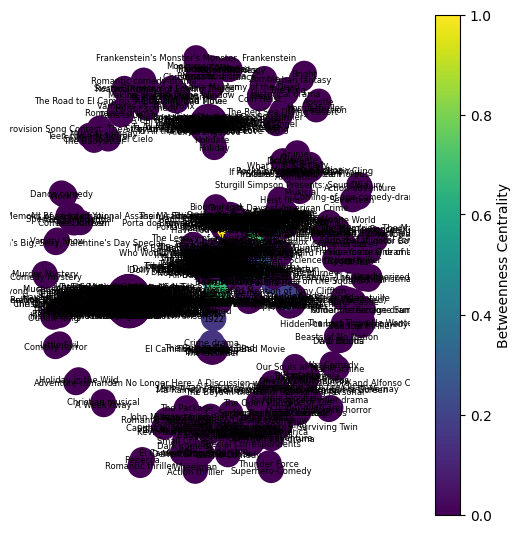

In [33]:
betweenness_centrality = nx.betweenness_centrality(C)

plt.figure(figsize=(5, 5))

color_map = [betweenness_centrality[node] for node in C.nodes()]

pos = nx.spring_layout(C, seed=42)
cmap = plt.cm.viridis  
nx.draw(C, with_labels=False, pos=pos, node_color=color_map, edge_color='gray', cmap=cmap)
nx.draw_networkx_labels(C, pos, font_size=6)

sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Betweenness Centrality')
plt.show()

Avaliação da tendência dos nós em se conectarem a nós com características semelhantes

In [34]:
assortativity = nx.degree_assortativity_coefficient(C)

print(f"Overall Assortativity = {assortativity}")

Overall Assortativity = -0.3337855882703579


Distribuição de filmes do Gênero Thriller contra o Comedy

O percentual de filmes Comedy (90%) é cerca de nove vezes maior que o de Thriller (10%)

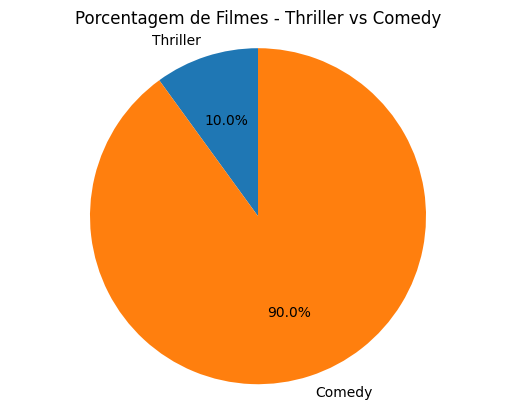

In [104]:
C = nx.Graph()

C.add_nodes_from(df['Title'], ntype='movie')

# add arestas ao grafo com base na coluna genero
for index, row in df.iterrows():
    title = row['Title']
    genres = row['Genre'].split('/')
    for genre in genres:
        C.add_edge(title, genre)

thriller_count = sum(1 for node in C.nodes() if 'Thriller' in node)
comedy_count = sum(1 for node in C.nodes() if 'Comedy' in node)

values = [thriller_count, comedy_count]

labels = ['Thriller', 'Comedy']

fig, ax = plt.subplots()

ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

#  aspecto para 'equal' para garantir que seja um círculo
ax.axis('equal')

ax.set_title('Porcentagem de Filmes - Thriller vs Comedy')

plt.show()

Grafo circular: filmes como nós e o gênero "thriller" de forma distinta no gráfico

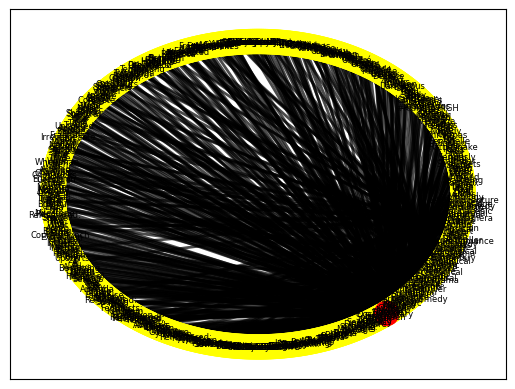

In [105]:
thriller_movies = [node for node in C.nodes() if node != 'Thriller']

# dicionário de cores para atribuir uma cor diferente aos nós de gênero thriller
node_colors = ['yellow' if node != 'Thriller' else 'red' for node in C.nodes()]

pos = nx.circular_layout(C)

# desenha nós e arestas
nx.draw_networkx_nodes(C, pos, nodelist=thriller_movies, node_color=node_colors[:-1], label=None)
nx.draw_networkx_nodes(C, pos, nodelist=['Thriller'], node_color='red', label=None)
nx.draw_networkx_edges(C, pos, width=2, alpha=0.7)

# add rótulos aos nós
labels = {node: node.split(' ')[0] if node != 'Thriller' else node for node in C.nodes()}
nx.draw_networkx_labels(C, pos, labels=labels, font_size=6)

plt.show()

Gerando visualização do grafo com pyvis (graph.html)

In [35]:
# cria uma instância da classe network
nt = Network('1000px', '1000px', notebook=True, bgcolor="#222222", font_color="white", filter_menu=True)

for node in df['Title']:
    nt.add_node(node, label=node)

nt.show('graph.html')
display(HTML('graph.html'))

graph.html


Gerando arquivo .graphml

In [ ]:
nx.write_graphml(G, "responses.graphml")